# Home assignment - Deep Learning (ITLB359, MIB)

## 1- Download dataset from google drive 

In [1]:
!wget "https://drive.google.com/uc?id=11UOCSc1ynUX1Mqj9M36s9_d0t-SFgjFG&export=download&authuser=0" -O real_sense.zip

!unzip real_sense.zip

--2023-04-14 12:30:01--  https://drive.google.com/uc?id=11UOCSc1ynUX1Mqj9M36s9_d0t-SFgjFG&export=download&authuser=0
Resolving drive.google.com (drive.google.com)... 2a00:1450:400d:808::200e, 142.251.208.142
Connecting to drive.google.com (drive.google.com)|2a00:1450:400d:808::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0fmgq45ksgoje6cttqnc6ca6gqk2eo1c/1681468200000/07111638629254909344/*/11UOCSc1ynUX1Mqj9M36s9_d0t-SFgjFG?e=download&uuid=da19df3b-8839-425d-af9c-aed59417b7b3 [following]
--2023-04-14 12:30:05--  https://doc-04-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0fmgq45ksgoje6cttqnc6ca6gqk2eo1c/1681468200000/07111638629254909344/*/11UOCSc1ynUX1Mqj9M36s9_d0t-SFgjFG?e=download&uuid=da19df3b-8839-425d-af9c-aed59417b7b3
Resolving doc-04-bk-docs.googleusercontent.com (doc-04-bk-docs.googleusercontent.com)... 2a00:1450:

In [82]:
%cd IBS_dataset_2023_spring

[Errno 2] No such file or directory: 'IBS_dataset_2023_spring'
/Users/iman/work/IBS3rdSemester/Deep learning/Iman/IBS_dataset_2023_spring


## 2- Libraries

In [100]:
import os
import cv2
import itertools
from random import sample
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.regularizers import l1
from tensorflow.keras import backend 
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Model , load_model
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers.experimental import AdamW


## 3- Convert from image dataset to NumPy array for training
### Dataset includes:
- #### label 2 is related to the real_sense_woman.
- #### label 1 is related to the real_sense_fadam.
- #### label 0 is related to the real_sense_fake.
### All photos are added to the dataset after resizing.

In [101]:
list_of_class2 = os.listdir("real_sense_woman100x100")
list_of_class1 = os.listdir("real_sense_fadam100x100")
list_of_class0 = os.listdir("real_sense_fake100x100")

#list consist of the names of pictures
name_of_pix = list_of_class2+list_of_class1+list_of_class0

labels2 = np.ones(len(list_of_class2)) * 2
labels1 = np.ones(len(list_of_class1))
labels0 = np.zeros(len(list_of_class0))
labels = np.concatenate((labels2, labels1, labels0), axis=0)

dataset = []
dim = (100, 100)

for img in list_of_class2:
  image = cv2.imread("real_sense_woman100x100/" + str(img))
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  dataset.append(resized)
for img in list_of_class1:
  image = cv2.imread("real_sense_fadam100x100/" + str(img))
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  dataset.append(resized)
for img in list_of_class0:
  image = cv2.imread("real_sense_fake100x100/" + str(img))
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  dataset.append(resized)


## 4- Display some images.

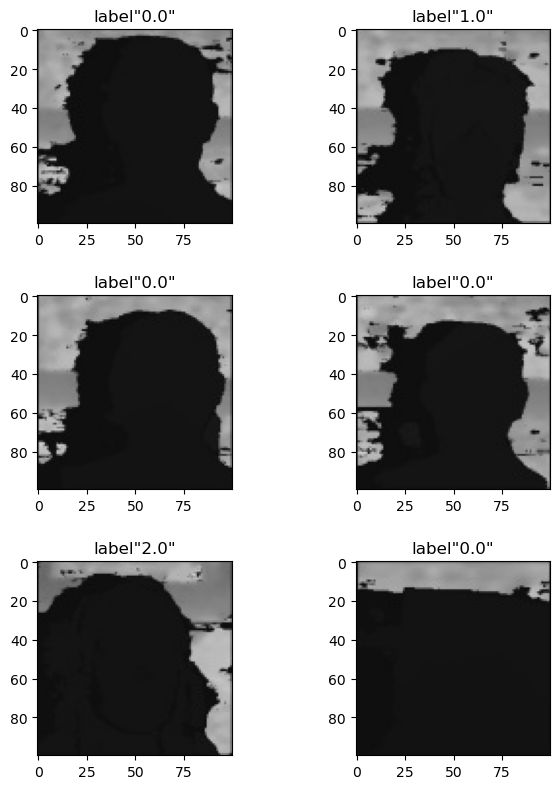

In [102]:
# Choose 6 random pictures from data set 
rand_idx = np.random.randint(len(dataset), size=6)

fig, axs = plt.subplots(3,2, figsize=(8,8)) 
for i, ax in enumerate(axs.flat):
    ax.imshow(dataset[rand_idx[i]])
    fig.tight_layout(h_pad=2, w_pad= 2)
    ax.set_title(f'label"{labels[rand_idx[i]]}"')
plt.show()    

## 5- Split to training, validation and test sets

### The created dataset is a List, thus first it is converted to the numpy array, then shuffling is done on it to disorder the ordered dataset, after that data is splited to three set with these proportions:
- ### 70 percent of data for training.
- ### 75 percentage of the 30 percentage of remaining data is used as validation data.
- ### The rest of data is considered as a test data set  

In [103]:
# Converting dataset and labels to the numpy array
dataset = np.array(dataset)
labels = np.array(labels)
# Shape of data
print(f'shape of dataset of images ===>{dataset.shape}')
print(f'shape of labels of images ====>{labels.shape}')


shape of dataset of images ===>(900, 100, 100, 3)
shape of labels of images ====>(900,)


In [104]:
# Disorder the ordered datasets. 
index = np.arange(dataset.shape[0])
np.random.shuffle(index)
dataset = dataset[index]
labels = labels[index]


In [105]:
# Making train, validation, and test datasets according to the specified sizes. 
X_train, X_test, y_train, y_test = train_test_split(dataset,labels, test_size=0.3, stratify=labels,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.25, stratify=y_test,random_state=42)

# Data scaling
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

# display the shapes

shapes = [[X_train.shape,y_train.shape],[X_val.shape,y_val.shape],[X_test.shape,y_test.shape]]
shape =pd.DataFrame(shapes, columns=['X', 'y'], index=['Train', 'Validation', 'Test'])
shape


,X,y
Train,"(630, 100, 100, 3)","(630,)"
Validation,"(202, 100, 100, 3)","(202,)"
Test,"(68, 100, 100, 3)","(68,)"


## 6- Create model and tune hyperprameters

- ### 6-1 Hyperparameters

In [114]:
n_classes = len(np.unique(labels))            # number of classes
conv_dropout =  [0.3, 0.4]              # dropout percentage for the convolution layers
dense_dropout = [0.25 , 0.35]           # dropout percentage for the dense layers 
epochs = 50                             # number of epochs 
batch_size = [64,128]                   # batch sizes                         
filters = [16, 32]                      # number of filters to extract features
optimizer = [Adadelta, AdamW]           # Optimizers               

- ### 6-2 Create a CNN model with characteristics as below: 
    - #### The model is created by functional approch
    - #### The cnn model is consist of 2 convolutional and 2 pooling layers
    - #### The model has two fully connected layers before the output layer
    - #### After each conv-pool layer and each dense layer a dropout is added for the regularization purpose. The dropouts are subjected to be tuned.
    - #### The l1 penalty function is used for regularization in the convelutional layers.
    - #### The Number of filters is subjected to be tuned
    - #### Pooling size is set to 4*4 with the stride of 4
    - #### Optimizer is subjected to be tuned.

In [115]:
def model_creator(filters, conv_dropout, dense_dropout, optimizer):
    backend.clear_session()
    tf.random.set_seed(42)
    # Define the inpute layer
    input = Input(shape = X_train.shape[1:])

    ################### Conv layer one #######################
    # Convolutional layer 1. 
    conv1 = Conv2D(filters, kernel_size = 5, 
                         padding = 'same', 
                         activation = 'relu',
                         kernel_regularizer=l1(0.01)
                         )(input)
    # pooling layer 1   
    pool1 = MaxPool2D(pool_size=4, strides=4)(conv1)
    # dropout after first conv-pool layer
    dropout1 = Dropout(conv_dropout)(pool1)

    ################### Conv layer two #######################
    # Convolutional layer 2. 
    conv2 = Conv2D(filters, kernel_size = 5, 
                         padding = 'same', 
                         activation = 'relu',
                         kernel_regularizer=l1(0.01)
                         )(dropout1)
    # pooling layer 2  
    pool2 = MaxPool2D(pool_size=4, strides=4)(conv2)
    # dropout after socond conv-pool layer
    dropout2 = Dropout(conv_dropout)(pool2)

    ################### Convert tensors to vectors #######################
    # Flatten the output from the conv_pool layers fo the dense layer        
    pool2_flat = Flatten()(dropout2)  

    ################### Fully connected layers 1 #######################          
    # dense layer 1.  
    dense1 = Dense(64, activation = 'relu')(pool2_flat)
    # dropout after first dense layer
    dropout3 = Dropout(dense_dropout)(dense1)

    ################### Fully connected layers 2 ####################### 
    # dense layer 2.  
    dense2 = Dense(32, activation = 'relu')(dropout3)
    # dropout after second dense layer
    dropout4 = Dropout(dense_dropout)(dense2)
    
    ################### Output layer ####################### 
    pred = Dense(n_classes, activation = 'softmax')(dropout4)

    ################### Full model ####################### 
    model = Model(inputs = input, outputs = pred)

    
    ##################### Compilation ########################
    model.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = optimizer(),
                  metrics = ['accuracy']) 
 
    return model    



- ### 6-3 Create a random grid search function for hyperprameter tuning.
    - #### Parameters are passed as an input argument to the function as a dictionary
    - #### Number of desired combination of parameters to check is passed as an input argument to the function. The defult value equals 4 combination
    - #### The function creates models based on selected combination of parameters and returns the best combination of hyperparameters and history of best model. The accuracy of validation set is used as a criterion
    - #### This function also saves the Best model.

In [126]:
def rand_grid_search(params = dict, number_of_test = 4):
    # Create grid of all parameters
    parameters_grid = list(itertools.product(*params.values()))
    # select randomly from the grid
    rnd_grid = sample(parameters_grid, k=number_of_test)
    
    best_acc = 0
    itter = 0
    for filter, conv_drop, dense_drop, opt, batch in rnd_grid:
        itter += 1
        print('================',itter)
        print(f'Model with: Filter={filter}; Conv_pool_drop={conv_drop}; Dense_drop={dense_drop}; Optimizer={opt}; Batch_size={batch}')

        model = model_creator(filter, conv_drop, dense_drop, opt)

        result = model.fit(
                            X_train,y_train,
                            epochs = epochs,
                            batch_size = batch,
                            validation_data = (X_val, y_val),
                            verbose = 0
                            )
        if result.history['val_accuracy'][-1] > best_acc:
            best_acc = result.history['val_accuracy'][-1]
            best_model = model
            best_history = result.history
            best_parameters = {
                                'filter': filter,
                                'conv_drop':conv_drop,
                                'dense_drop': dense_drop,
                                'optimizer': opt,
                                'batch': batch
                                }  
            
    best_model.save('best_cnn.h5')
    
    return best_parameters, best_history   



- ### 6-4 Create a function to plot the accuracy and loss of fitted model

In [127]:
def plot_train_val(results):
    
    # Plot the accuracy of train and validation Datasets
    fig, axs = plt.subplots(1,2 , figsize = (12,6))
    axs[0].plot(results['accuracy'])
    axs[0].plot(results['val_accuracy'])
    axs[0].set_title('Model accuracy')
    axs[0].set_ylabel('accuracy')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'valid'], loc='upper left')

    # Plot the loss of train and validation Datasets
    axs[1].plot(results['loss'])
    axs[1].plot(results['val_loss'])
    axs[1].set_title('Model loss')
    axs[1].set_ylabel('loss')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'valid'], loc='upper left')
    fig.tight_layout(h_pad=2, w_pad= 2)
    plt.show()

- ### 6-5 Create a function to run the model:
    - ### Run randomize grid search to find best hyperparameters and model
    - ### Plot the accuracy and loss of best model on train and validatioan dataset  
    - ### Evaluate the model on the test dataset. 

In [128]:
def run_model(hyper, num_of_models):

    best_params, best_history = rand_grid_search(hyper , num_of_models)
  
    cnn = load_model('best_cnn.h5')
    cnn.summary()
    
    hyper_parameters = pd.DataFrame(best_params.values(), best_params.keys(), columns=['best_values'])
    display(hyper_parameters)
    
    print("\nEvaluating on training set...")
    (loss, accuracy) = cnn.evaluate(X_train, y_train)
    print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

    print("\nEvaluating on testing set...")
    (loss, accuracy) = cnn.evaluate(X_test, y_test)
    print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

    history = best_history
    plot_train_val(history)
  
    

## 7- Run CNN and evalute the results. 
- ### Pass hyperparameters and desired number of their combination to check for the best model
- ### See the summary of the best cnn, its hyperprameters, plots of loss and accuracy, and result of evaluation on the test dataset

================ 1
Model with: Filter=32; Conv_pool_drop=0.3; Dense_drop=0.35; Optimizer=<class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>; Batch_size=64
================ 2
Model with: Filter=16; Conv_pool_drop=0.4; Dense_drop=0.35; Optimizer=<class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>; Batch_size=64
================ 3
Model with: Filter=32; Conv_pool_drop=0.4; Dense_drop=0.25; Optimizer=<class 'keras.optimizers.optimizer_experimental.adamw.AdamW'>; Batch_size=64
================ 4
Model with: Filter=32; Conv_pool_drop=0.3; Dense_drop=0.35; Optimizer=<class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>; Batch_size=128
================ 5
Model with: Filter=16; Conv_pool_drop=0.3; Dense_drop=0.25; Optimizer=<class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>; Batch_size=64
================ 6
Model with: Filter=32; Conv_pool_drop=0.4; Dense_drop=0.35; Optimizer=<class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>; Batch_size=128
Model: "model"
_______

,best_values
filter,32
conv_drop,0.4
dense_drop,0.25
optimizer,<class 'keras.optimizers.optimizer_experimenta...
batch,64



Evaluating on training set...
20/20 [==============================] - 1s 24ms/step - loss: 0.1525 - accuracy: 0.9905
loss=0.1525, accuracy: 99.0476%

Evaluating on testing set...
3/3 [==============================] - 0s 15ms/step - loss: 0.1657 - accuracy: 0.9853
loss=0.1657, accuracy: 98.5294%


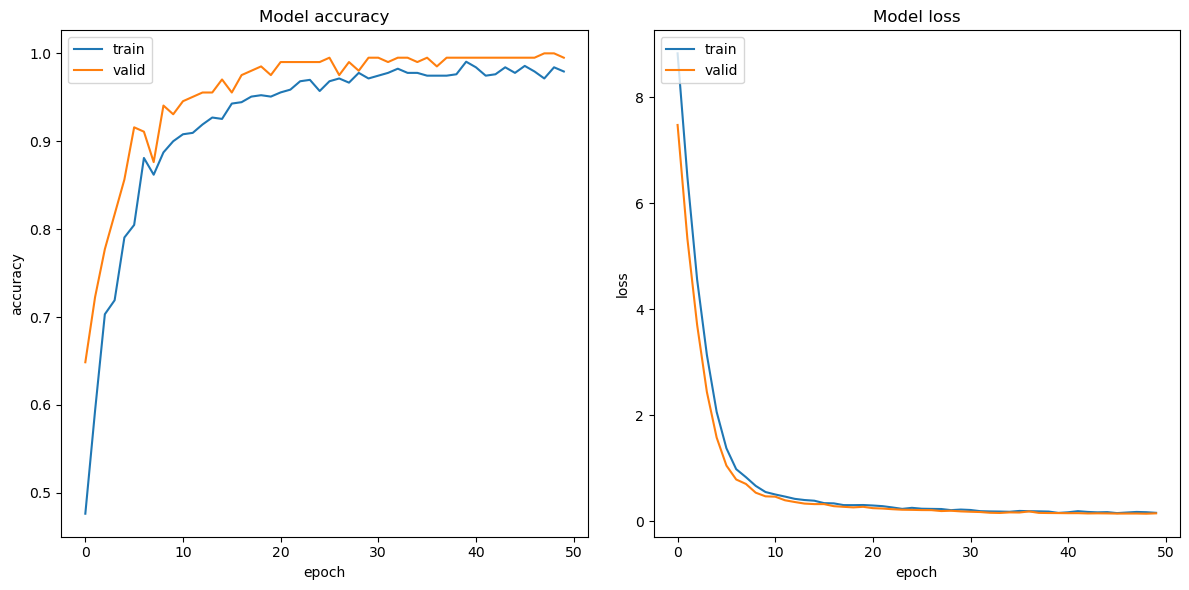

In [129]:

hyprprams = { 'filt': filters,
             'conv_dropout': conv_dropout,
             'dense_dropout': dense_dropout,
             'optimizer': optimizer,
             'batch_size': batch_size
            }
n_itter = 6
# Run the cnn model 
run_model(hyprprams, n_itter)

## 7- Evaluation
- ### Based on the analysis of the best CNN model, it was found to have 104,035 trainable parameters and the hyperparameters used for the model are provided in the accompanying table. The evaluation of the model on the test dataset yielded an accuracy of 0.9853, which indicates that the model performed well on the given task.

- ### Regarding the performance of the model, the loss plots for both the training and validation datasets suggest that the model has converged to an acceptable level after 10 epochs. Although there is a slight decrease in the losses after that, it is not substantial. Furthermore, the accuracy plots for both datasets show a similar trend, where the accuracy of the model increased significantly after 10 epochs and reached approximately 90%. With further training, the model could potentially achieve an accuracy of more than 98%.

- ### However, it is important to note that the accuracy plots suggest the presence of underfitting in the model. Despite this, the difference between the accuracy of the training and validation datasets is negligible, indicating that the model generalizes well to unseen data.

- ### Overall, the performance of the nominated CNN model is deemed acceptable, given its accuracy and loss metrics. However, further exploration could be conducted to improve the model's generalization capabilities and address the issue of underfitting.